In [46]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np


# Load the iris dataset
df = pd.read_csv('./iris.data', header=None)

# Establish a numberical mapping of the label classes
labels = {
    'Iris-setosa' : 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2,
}

# Split the dataframe in to feature and label datasets
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].map(labels).to_numpy()

In [40]:
# Define PCA decomposition
def pca(X, k=None):
    # Calculate the mean of the training features
    M = np.mean(X, axis=0)

    # Perform SVD on the centred training dataset
    U, S, V = np.linalg.svd(X - M, full_matrices=True)

    # ...
    W = V
    D = np.zeros(X.shape)
    np.fill_diagonal(D, S)
    Z = U @ D

    # Return the mean of the training features, the principle components and the projected training dataset
    if k:
        return M, W[:k], Z[:,:k]
    else:
        return M, W, Z


# Identify the top 2 principle components in the dataset 
_, _, Z = pca(X, k=2)

[]

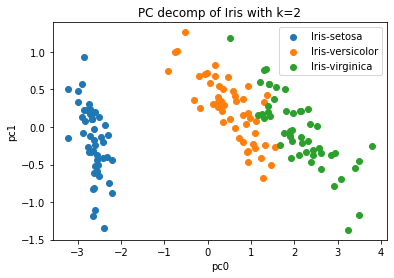

In [41]:

# Plot the decomposition of the data with the top 2 PCs
for label_name, label_id in labels.items():
    C = Z[np.where(y == label_id)]
    plt.scatter(C[:,0], C[:,1], label=label_name)

plt.title('PC decomp of Iris with k=2')
plt.xlabel('pc0')
plt.ylabel('pc1')
plt.legend(loc='upper right')
plt.plot()

In [42]:

# Multi-class linear regression classifier model
class Perceptron:

    def __init__(self, X, y, itrs=50):
        # Prepend a bias column to the dataset
        X = np.hstack((np.ones((len(X),1)), X))

        # Train the regression weights
        self.W = self.train(X, y, itrs)


    def train(self, X, y, itrs=50):
        # 
        classes = len(np.unique(y))
        dimensions = X.shape[1]

        # Init weights
        W = np.zeros((classes, dimensions))

        #
        for i in range(0, itrs):
            # Shuffle the training data
            X, y = shuffle(X, y)

            # Iterate through all feature-class pairs
            for x_i, y_i in zip(X, y):

                # Predict the class
                y_p = np.argmax(np.dot(W, x_i), axis=0)

                # If 
                if y_p != y_i:
                    W[y_i] += x_i
                    W[y_p] -= x_i
        
        return W
    

    def predict(self, X):
        # Prepend a bias column to the dataset
        X = np.hstack((np.ones((len(X),1)), X))

        # 
        return np.argmax(X @ self.W.T, axis=1)

    
    def accuracy(self, X, y):
        # Predict the dataset classes
        y_ = self.predict(X)

        # Compare the prediction and ground classes
        return np.sum(y == y_) / len(y)
          


# Execute on the 2D projection
m1 = Perceptron(Z, y)
print('2D: ', m1.accuracy(Z, y))

# Execute on the raw
m2 = Perceptron(X, y)
print('Raw: ', m2.accuracy(X, y))

# Execute on the 4D projection
_, _, Z = pca(X)
m3 = Perceptron(Z, y)
print('4D: ', m3.accuracy(Z, y))

2D:  0.9666666666666667
Raw:  0.9133333333333333
4D:  0.9666666666666667


In [51]:
 
def rbgKernel(X, gam):
    # TODO: Switch to gaussian kernel 
    # K = np.exp(gam * np.linalg.norm(X - X.T, ord=2))
    K = (1 + X @ X.T) ** 2

    #
    A = np.zeros(K.shape)
    np.fill_diagonal(A, 1 / len(X))

    # Normalise 
    return K - A @ K - K @ A + (A @ K) @ A



# K = rbgKernel(X, 1)
# _, W, _ = pca(K)


# Determine gamma range
X_centred = X - np.mean(X, axis=0)
var = X_centred.var(axis=0)
eps = 0.05
gam_min = 0.5 / (var.max() + eps)
gam_max = 0.5 / (var.min() + eps)
gam_range = np.arange(gam_min, gam_max, 0.10)
k_range = np.arange(X.shape[1]+1, X.shape[0]+1, 1)


# Iterate over gamma values 
for gam in gam_range:
    K = rbgKernel(X, gam)
    _, W, Z = pca(K)

    # Try top k components between d and n
    for k in k_range:
        W_ = W[:k]
        Z_ = Z[:,:k]

        m = Perceptron(Z_, y)
        acc = m.accuracy(Z_, y)
        print(k, gam, acc)
    




5 0.15911279272510853 0.8066666666666666
6 0.15911279272510853 0.8266666666666667
7 0.15911279272510853 0.8066666666666666
8 0.15911279272510853 0.7933333333333333
9 0.15911279272510853 0.8
10 0.15911279272510853 0.7533333333333333
11 0.15911279272510853 0.8
12 0.15911279272510853 0.7466666666666667
13 0.15911279272510853 0.8066666666666666
14 0.15911279272510853 0.8133333333333334
15 0.15911279272510853 0.8
16 0.15911279272510853 0.8
17 0.15911279272510853 0.8
18 0.15911279272510853 0.6866666666666666
19 0.15911279272510853 0.8333333333333334
20 0.15911279272510853 0.7866666666666666
21 0.15911279272510853 0.8066666666666666
22 0.15911279272510853 0.8066666666666666
23 0.15911279272510853 0.7933333333333333
24 0.15911279272510853 0.8
25 0.15911279272510853 0.82
26 0.15911279272510853 0.5533333333333333
27 0.15911279272510853 0.7666666666666667
28 0.15911279272510853 0.5266666666666666
29 0.15911279272510853 0.8
30 0.15911279272510853 0.7333333333333333
31 0.15911279272510853 0.8133333

KeyboardInterrupt: 

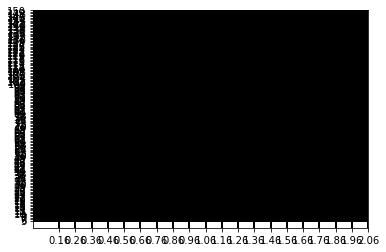

In [53]:
# Plot

# cmap = colors.ListedColormap(['red', 'blue'])
# bounds = [0,10,20]
# norm = colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots()
# ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(gam_range);
ax.set_yticks(k_range);

plt.show()
